## Machine Learning Operations

### 1. Rescaling Numerical data

Rescale numerical data data to be between teo values

In [1]:
import numpy as np
from sklearn import preprocessing

feature = np.array([[-500.5], [-100.1], [0], [100.1], [900.9]])

feature

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [4]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

scaled_feature = minmax_scale.fit_transform(feature)

scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

### 2. Standardize a feature(Numerical data)

Transform a feature to have mean 0 and standard deviation of 1

In [6]:
import numpy as np
from sklearn import preprocessing

feature = np.array([[-900.5], [-250.5], [150.9], [711.9], [9999.1]])

feature

array([[-900.5],
       [-250.5],
       [ 150.9],
       [ 711.9],
       [9999.1]])

In [8]:
standard_scaler = preprocessing.StandardScaler()

scaled_feature = standard_scaler.fit_transform(feature)

scaled_feature

array([[-0.69971382],
       [-0.53971903],
       [-0.4409161 ],
       [-0.30282829],
       [ 1.98317724]])

### 3. Normalizing observations(Numerical data)

Rescale the feature values of observations to have unit norm (total length of 1)

In [9]:
import numpy as np
from sklearn import preprocessing

feature = np.array([[0.4, 0.4], [1.5, 3.5], [1.2, 15.5], [1.89, 38.9], [20.2, 5.2]])

feature

array([[ 0.4 ,  0.4 ],
       [ 1.5 ,  3.5 ],
       [ 1.2 , 15.5 ],
       [ 1.89, 38.9 ],
       [20.2 ,  5.2 ]])

In [11]:
# L2 normalizing
normalizer = preprocessing.Normalizer(norm='l2')

normalized_feature = normalizer.transform(feature)

normalized_feature

array([[0.70710678, 0.70710678],
       [0.3939193 , 0.91914503],
       [0.07718838, 0.99701653],
       [0.04852887, 0.99882178],
       [0.96842682, 0.24929799]])

In [12]:
# L1 normalizing
normalizer = preprocessing.Normalizer(norm='l1')

normalized_feature = normalizer.transform(feature)

normalized_feature

array([[0.5       , 0.5       ],
       [0.3       , 0.7       ],
       [0.07185629, 0.92814371],
       [0.04633489, 0.95366511],
       [0.79527559, 0.20472441]])

### 4. Generate Polynomial and Intercation features(Numerical data)

Polynomial features are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

features = np.array([[2, 3], [2, 3]])

polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

transformed_features = polynomial_interaction.fit_transform(features)

transformed_features

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [16]:
# Setting interaction to True

polynomial_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

transformed_features = polynomial_interaction.fit_transform(features)

transformed_features

array([[2., 3., 6.],
       [2., 3., 6.]])

### 5. Custom transforming features(Numerical data)

Custom transformation to one or more features. We might want to create a feature that is the natural log of values of different feature. We can do this by creating a function and then mapping it to features using sklearn FunctionTransformer or pandas apply function

In [17]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

features = np.array([[2, 3], [2, 3], [2, 3]])

features

array([[2, 3],
       [2, 3],
       [2, 3]])

In [18]:
def add_ten(x):
    return x+10

ten_transformer = FunctionTransformer(add_ten)

transformed_features = ten_transformer.transform(features)

transformed_features

array([[12, 13],
       [12, 13],
       [12, 13]])

In [27]:
import pandas as pd

# Alternate way using pandas
df = pd.DataFrame(features, columns=['feature1', 'feature2'])

df.apply(add_ten)

print(df)
print('\n')

# convert back to numpy array
print('Converted back to numpy array :')
df.to_numpy()

   feature1  feature2
0         2         3
1         2         3
2         2         3


Converted back to numpy array :


array([[2, 3],
       [2, 3],
       [2, 3]])

### 6. Handling Outliers(Numerical data)

There are 3 ways we can handle outliers.
1. We can drop them
2. We can include them as feature
3. We can transform them

In [7]:
import pandas as pd

# create a dataframe
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Rooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 40000]

houses

,Price,Rooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,40000


In [3]:
# First way, dropping the observation
houses = houses[houses['Rooms'] < 20]
houses

,Price,Rooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [6]:
# note : execute first step before proceeding
import numpy as np

# Second way, incluse them as feature
houses['Outlier'] = np.where(houses['Rooms'] < 20, 0, 1)
houses

,Price,Rooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,40000,1


In [8]:
# note : execute first step before proceeding
import numpy as np

# Third way, transforming the features
houses['Log_of_square_feet'] = [np.log(x) for x in houses['Square_Feet']]
houses

,Price,Rooms,Square_Feet,Log_of_square_feet
0,534433,2.0,1500,7.313220
1,392333,3.5,2500,7.824046
2,293222,2.0,1500,7.313220
3,4322032,116.0,40000,10.596635


### 7. Discretizing Features(NUmerical data)

We have numerical values and want to break them into discrete bins.<br>
Depending on how we want to break up data, there are two techniques.<br>
-> Binarize feature according to some threshold<br>
-> Break up numerical values according to multiple thresholds

In [9]:
# Binarize feature according to some threshold
import numpy as np
from sklearn.preprocessing import Binarizer

# feature
age = np.array([[6], [12], [20], [36], [65]])

binarizer = Binarizer(18)

transformed_age = binarizer.fit_transform(age)
transformed_age

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [10]:
# Break up numerical values according to multiple thresholds

second_transformed_age = np.digitize(age, bins=[20, 30, 40]) # right=True, includes bins as well
second_transformed_age

# Note : we can also use digitize to binarize, having only one bin

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

### 8. Grouping observations using clustering(Numerical data)

We want to cluster observations so that similar observations are grouped together. If we know, we have k groups, we can use k-means clustering to group similar observations and output a new feature containing each observation's group membership

In [18]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

features, _ = make_blobs(n_samples=50, n_features=2, centers=3, random_state=1)

df = pd.DataFrame(features, columns=['feature_1', 'feature_2'])

clusterer = KMeans(3, random_state=0)

clusterer.fit(features)

df['group'] = clusterer.predict(features)

df.head(5)

,feature_1,feature_2,group
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0


### 9. Deleting Observations with Missing Values(Numerical data)

In [22]:
import numpy as np

features = np.array([[1.1, 11.1], [2.2, 22.2], [3.3, 33.3], [4.4, 44.4], [np.nan, 55]])

# Keep only observations that are not (denoted by -) missing
new_features = features[~np.isnan(features).any(axis=1)]

new_features

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [24]:
# Alternate way of dropping of mossing observations using Pandas
import pandas as pd

df = pd.DataFrame(features, columns=['feature_1', 'feature_2'])

df = df.dropna()

df

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


### 10. Encoding nominal categorical features(Categorical data)

We have a feature with nimonal classes that has no intrinsic ordering(e.g. apple, pear, banana)

In [25]:
# One-hot encode the features using sklearn LabelBinarizer
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

feature = np.array([['Mumbai'], ['Bangalore'], ['New Delhi'], ['Kolkata'], ['Chennai']])

one_hot = LabelBinarizer()

new_feature = one_hot.fit_transform(feature)
new_feature

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [26]:
# Different classes
one_hot.classes_

array(['Bangalore', 'Chennai', 'Kolkata', 'Mumbai', 'New Delhi'],
      dtype='<U9')

In [27]:
# Reverse transform
one_hot.inverse_transform(new_feature)

array(['Mumbai', 'Bangalore', 'New Delhi', 'Kolkata', 'Chennai'],
      dtype='<U9')

In [28]:
# Alternate way using Pandas
import pandas as pd

pd.get_dummies(feature[:,0])

,Bangalore,Chennai,Kolkata,Mumbai,New Delhi
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,1,0,0,0


### 11. Encoding nominal categorical features of multi-class(Categorical data)

In [29]:
multiclass_feature = [('Texas', 'Florida'), ('California', 'Alabama'), ('Texas', 'Florida'), ('Delware', 'Florida'), ('Texas', "Alabama")]

one_hot_multiclass = MultiLabelBinarizer()

new_multiclass_feature = one_hot_multiclass.fit_transform(multiclass_feature)

new_multiclass_feature

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [31]:
# Different classes
one_hot_multiclass.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

### 12. Encoding Ordinal categorical features

Ordinal categorical features are ex:- high, medium, low

In [1]:
# Use of Pandas
import pandas as pd

df = pd.DataFrame({'Score' : ['Low', 'Low', 'Medium', 'Medium', 'High']})

scale_mapper = {'Low':1, 'Medium':2, 'High':3}

df = df['Score'].replace(scale_mapper)
df

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [2]:
# For more than 3 ordinal categorical features
import pandas as pd

df = pd.DataFrame({'Score' : ['Low', 'Low', 'Medium', 'Medium', 'High', 'Barely more than medium']})

scale_mapper = {'Low':1, 'Medium':2, 'Barely more than medium':3, 'High':4}

df = df['Score'].replace(scale_mapper)
df

0    1
1    1
2    2
3    2
4    4
5    3
Name: Score, dtype: int64

In [3]:
# For more than 3 ordinal categorical features
import pandas as pd

df = pd.DataFrame({'Score' : ['Low', 'Low', 'Medium', 'Medium', 'High', 'Barely more than medium']})

scale_mapper = {'Low':1, 'Medium':2, 'Barely more than medium':2.2, 'High':4}

df = df['Score'].replace(scale_mapper)
df

0    1.0
1    1.0
2    2.0
3    2.0
4    4.0
5    2.2
Name: Score, dtype: float64

### 13. Encoding dictionaries of features

We have a dicionary and want to convert into a feature matrix

In [7]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'Red':2,'Blue':4}, {'Red':4, 'Blue':3}, {'Red':1, 'Yellow':2},{'Red':2, 'Yellow':2}]

dict_vectorizer = DictVectorizer(sparse=False)

features = dict_vectorizer.fit_transform(data_dict)
features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

In [8]:
dict_vectorizer.get_feature_names()

['Blue', 'Red', 'Yellow']

### 14. Basic Cleaning of Given Text

1. Remove whitespaces
2. Remove periods '.'
3. Convert to lowercase

In [11]:
# Given text
text_data = ['    Anskhoiuhc. By aoihouhoie HJkoiojueiujbh    ', 
             'Pakiuguiyvc iyubviygiy. uhiu', '     Ueiyvuc kaushiuhi asiuhi. aiugiuy    ']

# Strip whitespaces
strip_whitespace = [a.strip() for a in text_data]
strip_whitespace

['Anskhoiuhc. By aoihouhoie HJkoiojueiujbh',
 'Pakiuguiyvc iyubviygiy. uhiu',
 'Ueiyvuc kaushiuhi asiuhi. aiugiuy']

In [12]:
# Remove periods '.'
remove_periods = [a.replace('.','') for a in strip_whitespace]
remove_periods

['Anskhoiuhc By aoihouhoie HJkoiojueiujbh',
 'Pakiuguiyvc iyubviygiy uhiu',
 'Ueiyvuc kaushiuhi asiuhi aiugiuy']

In [14]:
# Convert to lowercase
lowercase = [a.lower() for a in remove_periods]
lowercase

['anskhoiuhc by aoihouhoie hjkoiojueiujbh',
 'pakiuguiyvc iyubviygiy uhiu',
 'ueiyvuc kaushiuhi asiuhi aiugiuy']

### 15. Parsing and Cleaning HTML

We have text data with HTML elements and want to extract just the text

In [19]:
from bs4 import BeautifulSoup

text = '''
<td><a href="http://www.irit.fr/SC">Signal et Communication</a>
<br/><a href="http://www.irit.fr/IRT">Ingénierie Réseaux et Télécommunications</a>
</td>
'''
soup = BeautifulSoup(text)

print(soup.get_text())

Signal et Communication
Ingénierie Réseaux et Télécommunications




### 16. Remove punctuation

In [21]:
# punctuation marks 
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

text = "Welcome???@@##$ to#$% Machine%$^ learning$%^& for beginners"

for x in text.lower():
    if x in punctuations:
        text = text.replace(x, '')
text

'Welcome to Machine learning for beginners'

### 17. Tokenizing Text

1. Tokenizing into words
2. Tokenizing into sentences

We have text and break into individual words

In [25]:
# Tokenizing into words
from nltk.tokenize import word_tokenize

text = "This is good reference for machine learning operations"

word_tokenize(text)

['This', 'is', 'good', 'reference', 'for', 'machine', 'learning', 'operations']

In [26]:
# Tokenizing into sentences
from nltk.tokenize import sent_tokenize

text = "Hi how are you. I am fine how about you. Me too fine. Nice to meet you."

sent_tokenize(text)

['Hi how are you.',
 'I am fine how about you.',
 'Me too fine.',
 'Nice to meet you.']

### 18. Removing Stopwords

Given text data remove extremely common words.

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = "This is good reference for machine learning operations"
text = word_tokenize(text)

stop_words = stopwords.words('english')

cleaned_text = [word for word in text if word not in stop_words]
cleaned_text

['This', 'good', 'reference', 'machine', 'learning', 'operations']

In [33]:
# If we want to see first 10 stopwords
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### 19. Stemming words

In [35]:
from nltk.stem.porter import PorterStemmer

tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']
print('Before stemming :')
print(stemmed_words)
print('\n')
porter = PorterStemmer()

stemmed_words = [porter.stem(word) for word in tokenized_words]
print('After stemming :')
print(stemmed_words)

Before stemming :
['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']


After stemming :
['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']


### 20. Encoding Text as Bag of Words

We have text data and want to create a set of features indicating the number of times an observation's text contains a particular word

In [38]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

text_data = np.array(['Machine learning', 'Deep learning', 'Artificial Intelligence'])

count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

bag_of_words

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [39]:
bag_of_words = bag_of_words.toarray()
bag_of_words

array([[0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0]], dtype=int64)

In [40]:
# Getting feature names
count.get_feature_names()

['artificial', 'deep', 'intelligence', 'learning', 'machine']

In [46]:
count.vocabulary_

{'machine': 4, 'learning': 3, 'deep': 1, 'artificial': 0, 'intelligence': 2}

### 21. Encoding Text with Weighing word importance(TFIDF)

In [42]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = np.array(['Machine learning', 'Deep learning', 'Artificial Intelligence'])

tfidf = TfidfVectorizer()

feature_matrix = tfidf.fit_transform(text_data)
feature_matrix

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [43]:
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.60534851, 0.79596054],
       [0.        , 0.79596054, 0.        , 0.60534851, 0.        ],
       [0.70710678, 0.        , 0.70710678, 0.        , 0.        ]])

In [44]:
tfidf.get_feature_names()

['artificial', 'deep', 'intelligence', 'learning', 'machine']

In [45]:
tfidf.vocabulary_

{'machine': 4, 'learning': 3, 'deep': 1, 'artificial': 0, 'intelligence': 2}

### 22. Reducing Features using Principal Components

Given set of features reduce the number of features while retaining the variance of the data

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()

features = StandardScaler().fit_transform(digits.data)
features

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [50]:
pca = PCA(n_components=0.99, whiten=True)

features_pca = pca.fit_transform(features)
features_pca

array([[ 0.70631939, -0.39512814, -1.73816236, ...,  0.36526417,
        -0.31369006,  0.05355504],
       [ 0.21732591,  0.38276482,  1.72878893, ..., -0.17818068,
        -0.14031747,  1.18179755],
       [ 0.4804351 , -0.13130437,  1.33172761, ..., -0.01924571,
        -0.23580029,  0.92966158],
       ...,
       [ 0.37732433, -0.0612296 ,  1.0879821 , ..., -1.05526847,
         1.75559618, -0.87894699],
       [ 0.39705007, -0.15768102, -1.08160094, ...,  0.10442881,
         0.65907949,  1.1292155 ],
       [-0.46407544, -0.92213976,  0.12493334, ..., -1.10593026,
         0.54434185, -0.26573597]])

In [52]:
print('Original number of features :', features.shape[1])
print('Reduced number of features :', features_pca.shape[1])

Original number of features : 64
Reduced number of features : 54


### 23. Thresholding Numerical Feature Variance (Dimensionality reduction technique)

We have a set of numerical features and want to remove those with low variance(ie. likely containing little information). Need to select subset of features with variances above given threshold.

In [57]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

iris = datasets.load_iris()

features = iris.data
target = iris.target

thresholder = VarianceThreshold(threshold=0.5)

features_high_variance = thresholder.fit_transform(features)

features_high_variance[0:3]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2]])

In [68]:
print('Original data matrix :\n', features[0:3])
print('\n')
print('High variance data matrix :\n', features_high_variance[0:3])

Original data matrix :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


High variance data matrix :
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]]


In [72]:
print('Variances of different features :\n')
print(thresholder.variances_)

Variances of different features :

[0.68112222 0.18871289 3.09550267 0.57713289]


### 24. Thresholding binary feature variance(dimensionality reduction technique)

We have a set of binary categorical features and want to remove those with low variance(ie. likely containing little information). Select a subset of features with a Bernoulli random variable variance above a given threshold.

In [74]:
from sklearn.feature_selection import VarianceThreshold

features = [[0, 1, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0]]

thresholder = VarianceThreshold(threshold=(0.75*(1-0.75))) 

thresholder.fit_transform(features)

# note : In binary features ie. Bernoulli random variable variance is calculated as Var(x)=p(1-p)
#        where p is the proportion of observations of class 1. Hence by setting p, we can remove
#        features where the vast majority of observations are one class

array([[0],
       [1],
       [0],
       [1],
       [0]])

### 25. Handling Highly Correlated features(dimensionality reduction technique)

We have a feature matrix and suspect some features are highly correlated. Using this correlation matrix to check highly correlated features. If highly correlated features exists, consider dropping one of the correlated features.

In [75]:
import pandas as pd
import numpy as np

features = np.array([[1, 1, 1], [2, 2, 0], [3, 3, 1], [4, 4, 0], [5, 5, 1], [6, 6, 0], [7, 7, 1], [8, 7, 0]])
features

array([[1, 1, 1],
       [2, 2, 0],
       [3, 3, 1],
       [4, 4, 0],
       [5, 5, 1],
       [6, 6, 0],
       [7, 7, 1],
       [8, 7, 0]])

In [76]:
# convert feature matrix into dataframe
df = pd.DataFrame(features)
df

,0,1,2
0,1,1,1
1,2,2,0
2,3,3,1
3,4,4,0
4,5,5,1
5,6,6,0
6,7,7,1
7,8,7,0


In [77]:
# create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,0,1,2
0,1.000000,0.991837,0.218218
1,0.991837,1.000000,0.177084
2,0.218218,0.177084,1.000000


In [78]:
# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,0,1,2
0,NaN,0.991837,0.218218
1,NaN,NaN,0.177084
2,NaN,NaN,NaN


In [80]:
# find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
df.drop(df.columns[to_drop], axis=1).head()

,0,2
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1


### 26. Removing Irrelavant Features for Classification(dimensionality reduction technique)

We have categorical target vector and want to remove uninformative features.
1. If the features are categorical, calculate chi-square statistic between each feature and the target vector.
2. If the features are quantitative, compute the ANOVA F-value between each feature and the target vector.

In [86]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

iris = load_iris()
features = iris.data
target = iris.target

# convert to categorical data by converting data to integers
features = features.astype(int)

# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)

print('Original no. of features :', features.shape[1])
print('Reduced no. of features :', features_kbest.shape[1])

Original no. of features : 4
Reduced no. of features : 2


In [87]:
# If the features are quantitative, compute the ANOVA F-value between each feature and the target vector
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

print('Original no. of features :', features.shape[1])
print('Reduced no. of features :', features_kbest.shape[1])

Original no. of features : 4
Reduced no. of features : 2


### 27. Cross Validating Models

We want to evaluate how well our model will work in the real world

In [90]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [94]:
# load dataset
digits = datasets.load_digits()

# create feature matrix
features = digits.data

# create target vector
target = digits.target

# create standardizer
standardizer = StandardScaler()

# create logistic regression object
logistic = LogisticRegression()

# create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logistic)

# create k-fild cv
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# conduct k-fold cv
cv_results = cross_val_score(pipeline, features, target, cv=kf, scoring='accuracy', n_jobs=-1)

# calculate mean
cv_results.mean()

0.9693916821849783

In [95]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

### 28. Create a Baseline Regression Model

We want a simple baseline regression model to complare against your model. Sklearn's DummtRegressor helps here.

In [96]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [99]:
# load data
boston = load_boston()

# create features
features, target = boston.data, boston.target

# train test split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# train dummy regressor
dummy.fit(features_train, target_train)

# get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

In [101]:
# To compare, we train out model and evaluate the performance score
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(features_train, target_train)

# R-squared score
ols.score(features_test, target_test)

0.6354638433202114

### 29. Create a Baseline Classification Model

In [103]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [104]:
# load data
boston = load_iris()

# create features
features, target = iris.data, iris.target

# train test split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# create a dummy regressor
dummy = DummyClassifier(strategy='uniform', random_state=1)

# train dummy regressor
dummy.fit(features_train, target_train)

# get R-squared score
dummy.score(features_test, target_test)

0.42105263157894735

In [105]:
# To compare, we train out model and evaluate the performance score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)

# R-squared score
classifier.score(features_test, target_test)

0.9736842105263158

### 30. Evaluating Binary Classifier Predictions

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [110]:
X, y = make_classification(n_samples=10000, n_features=3, n_informative=3, n_redundant=0, n_classes=2, random_state=1)

logistic = LogisticRegression()

cross_val_score(logistic, X, y, scoring = 'accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [111]:
cross_val_score(logistic, X, y, scoring = 'precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [112]:
cross_val_score(logistic, X, y, scoring = 'recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [113]:
cross_val_score(logistic, X, y, scoring = 'f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [115]:
# Using CV if we have true y values and the predicted y values. We can calculate metrics
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

y_hat = logistic.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_hat)

0.947

### 31. Evaluating Binary Classifier Thresholds

We want to evaluate a binary classifier and various probability thresholds

In [119]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# create feature matrix and target vector
features, target = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=3, random_state=3)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# create classifier
logistic = LogisticRegression()

# train model
logistic.fit(features_train, target_train)

# get predicted probabilities
target_probabilities = logistic.predict_proba(features_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

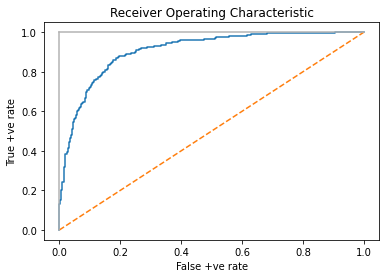

In [120]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True +ve rate")
plt.xlabel("False +ve rate")
plt.show()

### 32. Evaluating Multicalss Classifier Predictions

We have a model that predicts three or more classes and want to evaluate its performance

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate feature matrix and target vector
features, target = make_classification(n_samples=10000, n_features=3, n_informative=3, n_redundant=0, n_classes=3, random_state=1)

# create logistic regression
logistic = LogisticRegression()

# cross-validate model using accuracy
cross_val_score(logistic, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [122]:
# cross-validate model using accuracy and parallel processing
cross_val_score(logistic, features, target, scoring='accuracy', n_jobs=-1)

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [123]:
# cross-validate model using f1 micro
cross_val_score(logistic, features, target, scoring='f1_micro')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

### 33. Visualizing a Classifier's Performance

Given predicted classes and true classes of the test data, want to visually compare model's quality

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
# load data
iris = datasets.load_iris()

# create feature matrix
features = iris.data

# create target vector
target = iris.target

# create alist of target classnames
class_names = iris.target_names

# create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# create logostic regression
logistic = LogisticRegression()

# train model and make predictions
target_predicted = logistic.fit(features_train, target_train).predict(features_test)

In [25]:
# create confuction matrix
matrix = confusion_matrix(target_test, target_predicted)
matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [26]:

# create pandas dataframe
df = pd.DataFrame(matrix, index=class_names, columns=class_names)
df

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


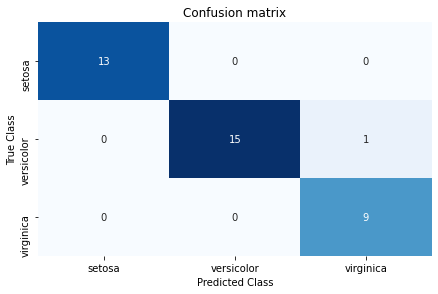

In [27]:
# create heatmap
sns.heatmap(df, annot=True, cbar=None, cmap='Blues')
plt.title("Confusion matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

### 34. Evaluating Regression Models

We want to evaluate performance of the regression model

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
# generate feature matrix and target vector
features, target = make_regression(n_samples=100, n_features=3, n_informative=3, n_targets=1, noise=50, coef=False, random_state=1)

# create a linear regression model
lin_reg = LinearRegression()

# cross validate linear regression using neagative MSE
cross_val_score(lin_reg, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [4]:
# cross validate linear regression using neagative R2
cross_val_score(lin_reg, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

<b>Note :</b><br>
    1> Negative MSE best value = 0.0<br>
    2> R2 best values : 1.0

### 35. Selecting Best Model using Exhaustive Search

We want to select the best model by searching over a range of hyperparameters

In [9]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
# load data
iris = datasets.load_iris()
features = iris.data
targets = iris.target

# create logistic regression model
log_reg = linear_model.LogisticRegression()

# create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']

# create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 10)

#create dictionary hyperparameter values
hyperparams = dict(C=C, penalty=penalty)

# create grid search
gridsearch = GridSearchCV(log_reg, hyperparams, cv=5, verbose=0)

#fit grid search
best_model = gridsearch.fit(features, targets)

In [11]:
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 7.742636826811269


In [13]:
# predict target vector\
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 36. Selecting Best Model using Randomized Search

In [17]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [18]:
# load data
iris = datasets.load_iris()
features = iris.data
targets = iris.target

# create logistic regression model
log_reg = linear_model.LogisticRegression()

# create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']

# create distibution of candidate regularization hyperparameter values
C = uniform(loc=0, scale=4)

#create dictionary hyperparameter values
hyperparams = dict(C=C, penalty=penalty)

# create grid search
randomsearch = RandomizedSearchCV(log_reg, hyperparams, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [21]:
best_model = randomsearch.fit(features, targets)

print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 2.4381112763728496


In [22]:
# predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 37. Linear Regression - Fitting Line

We want to train a model that represents a linear relationship between feature and target vector

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# load data with only 2 features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

# create linear regression model
lin_reg = LinearRegression()

model = lin_reg.fit(features, target)

In [2]:
# view the intercept
model.intercept_

22.485628113468223

In [3]:
# view the feature coefficients
model.coef_

array([-0.35207832,  0.11610909])

### 38. Logistic Regression - Training a Binary Classifier

We need to train a simple binary classifier model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [11]:
# load data with only 2 classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# standardize feature
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
log_reg = LogisticRegression(random_state=0)

# train model
model = log_reg.fit(features_standardized, target)

In [12]:
# create a new observation
new_observation = [[.5, .5, .5, .5]]

# predict class
model.predict(new_observation)

array([1])

In [14]:
# view predicted probabilities
model.predict_proba(new_observation)

array([[0.17738424, 0.82261576]])

### 39. Logistic Regression - Training a Multiclass Classifier

Given more than 2 classes, need to train a classifier model. Logistic regression model using one-vs-rest or multinomial methods

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [17]:
# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# standardize feature
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
log_reg = LogisticRegression(random_state=0, multi_class='ovr')

# train model
model = log_reg.fit(features, target)

In [24]:
# create a new observation
new_observation = [[.5, .5, .5, .5]]

# predict class
model.predict(new_observation)

array([0])

In [25]:
# view predicted probabilities
model.predict_proba(new_observation)

array([[5.02652534e-01, 4.97344952e-01, 2.51345605e-06]])

### 40. Logistic Regression - Reducing Variance through Regularization

Need to reduce variance of the logistic regression model using regularization.

In [26]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [27]:
# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# standardize feature
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# create logistic regression classifier object
log_reg = LogisticRegressionCV(penalty='l2', Cs=10, random_state=0, n_jobs=-1)

# train model
model = log_reg.fit(features_standardized, target)

In [28]:
# create a new observation
new_observation = [[.5, .5, .5, .5]]

# predict class
model.predict(new_observation)

array([1])

In [29]:
# view predicted probabilities
model.predict_proba(new_observation)

array([[5.96244929e-04, 9.70140320e-01, 2.92634349e-02]])

### 41. Training a Decision Tree Classifier

We need to train a classifier using Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [6]:
# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create decision tree classifier object
model = DecisionTreeClassifier(random_state=0)

# train model
model.fit(features, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
# new observation
observation = [[5, 4, 3, 2]]

# predict observation's class
model.predict(observation)

array([1])

In [9]:
# predicted class probabilities
model.predict_proba(observation)

array([[0., 1., 0.]])

In [11]:
# Training model with 'entropy'
model_with_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')

model_with_entropy.fit(features, target)

# new observation
observation = [[5, 4, 3, 2]]

# predict observation's class
print('Predicted :', model.predict(observation))

# predicted class probabilities
print('Predicted class probabilities : ',model.predict_proba(observation))

Predicted : [1]
Predicted class probabilities :  [[0. 1. 0.]]


### 42. Training Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

In [28]:
# load data with only 2 features
boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

# create decision tree regressor object
model = DecisionTreeRegressor(random_state=0)

# train model
model.fit(features, target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [30]:
# new observation
observation = [[0.02, 16]]

# predict model
print('Model prediction : ',model.predict(observation))

Model prediction :  [33.]


In [32]:
# Model with creterion as 'mae' ie. mean absolute error
new_model = DecisionTreeRegressor(random_state=0)
new_model.fit(features, target)
observation = [[0.02, 160]]
model.predict(observation)

array([50.])